# Playground

This notebook is for playing around with the data/troubleshooting issues

In [1]:
#path to beads
my_path = '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/'

In [8]:
#system
from __future__ import division
import sys
import importlib

#numpy
import numpy as np

#astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.table import QTable
from astropy import wcs
from astropy.wcs import WCS
from astropy.cosmology import LambdaCDM
import astropy.units as u
from astropy.coordinates import Angle
import astropy.constants as const

#spectral fitting
import pyspeckit

#matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.style as style
from matplotlib import cm
from matplotlib.colors import LogNorm
%matplotlib inline

#scipy
from scipy import integrate
from scipy.integrate import quad
from scipy import stats

#pv stuff

from spectral_cube import SpectralCube

#seaborn
import seaborn as sns



#warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import my own functions: you can see them in full in the utils folder
util_path = my_path + 'Notebooks/Beads20/utils/'
sys.path.append(util_path)

import plotting_functions as pf
import science_functions as af

In [4]:
importlib.reload(pf)

<module 'plotting_functions' from '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Notebooks/Beads20/utils/plotting_functions.py'>

In [4]:
#About
name = 'SDSS J1531+3414'
ra = 232.7936938
dec = 34.2404172
radius = Angle(2.5, u.arcsec)

zh  = 0.335 #z selected from Hennawi (2008)
cz = zh * const.c.to('km/s')

In [5]:
cosmo = LambdaCDM(H0=71, Om0=0.27, Ode0=0.73)
da = cosmo.angular_diameter_distance(zh)
dl = cosmo.luminosity_distance(zh)

In [6]:

file_path = 'Analysis/almaBeads/cannon/'
co32_file = my_path + 'Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor.fits'

m0_file = my_path + 'Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor_M0.fits'

fig_path = my_path + 'Figures/paper/'

In [7]:
#plot style
#pf.styleplots(presentation=True)

# Notebook 2

### Gaussian Fit Integral Correct

In [33]:
mu, sigma = 352.3, 130
amp = 3.92
# def gauss(x):
#     return amp * stats.norm.pdf(x, mu, sigma)

def gauss(x, mu, sigma, amp):
    return amp * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def gauss_integral(lowerbound, upperbound, mu, sigma, amp):
    integral = quad(gauss, lowerbound, upperbound, args=(mu, sigma, amp))
    return integral


In [34]:
integral = gauss_integral(0, 800, mu, sigma, amp)

In [35]:
integral

(1272.7141757263425, 1.412996581990223e-11)

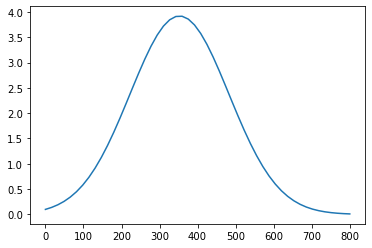

In [31]:
x = np.linspace(0, 800, 50)
plt.plot(x, gauss(x))

In [ ]:
af.extract_cube_spectrum(cube, nrms=5, sigma_clip=3)

In [ ]:
def gauss(x, mu, sigma):
    return stats.norm.pdf(x, mu, sigma)

def gauss_integral(lowerbound, upperbound):
    integral = quad(gauss, lowerbound, upperbound)
    return integral


## PySpecKit

In [23]:
cube = totcubes[3]

In [24]:
# cube = totcubes[0]
cube_rms= np.sqrt(np.nanvar(cube[:5, :, :])) * cube.unit# 0.204 * u.mJy/u.beam#cube.statistics()['rms']

#select emission > 2sigma


cubespec = cube.mean(axis=(1, 2)) 
#find number of pixels in each velocity channel
nspec = cube.sum(axis=(1, 2))/cube.mean(axis=(1, 2)) #number of pixels

#convert from jy/beam to jy and get the total flux
cubespec_Jy = af.jy(cubespec, nspec, cube) 

#correct for offset
# cubespec_hdu = cubespec_Jy.hdu
# vregion = 0 * (u.km/u.s)

# # restf = cubespec.wcs.wcs.restfrq*u.Hz
# # offset = restf-(vregion).to(u.GHz,u.doppler_radio(restf))

# #fit spectrum
# if chatty is not False:
#     print("...defining spectral axis, errors, and fitting spectrum...")

# The following will define the spectral axis units using the specified velocity convention
spectral_axis = cubespec_Jy.with_spectral_unit(u.km/u.s).spectral_axis

#standard deviation
err_jy_beam = np.full(len(cubespec), cube_rms) * cube_rms.unit
err_jy = af.jy(err_jy_beam, nspec, cube) 

In [25]:
cube_rms

<Quantity 5.8128287e-05 Jy / beam>

In [47]:
if not cube_rms > 0:
    print("hi")

hi


In [34]:
cube.sum(axis=(1, 2))

<OneDSpectrum [       nan,       nan,       nan,       nan,       nan,
                      nan,       nan,       nan,0.00545698,0.03776164,
               0.10524639,0.05330089,0.06246629,0.10625038,0.04178509,
               0.04301572,0.03800807,0.00134575,       nan,       nan] Jy / beam>

In [37]:
cube.mean(axis=(1, 2))

<OneDSpectrum [       nan,       nan,       nan,       nan,       nan,
                      nan,       nan,       nan,0.00045475,0.00059003,
               0.00071112,0.00050763,0.00054319,0.00064787,0.0005498 ,
               0.00053106,0.00054297,0.00044858,       nan,       nan] Jy / beam>

In [38]:
nspec

<OneDSpectrum [ nan, nan, nan, nan, nan, nan, nan, nan, 12., 64.,148.,105.,
               115.,164., 76., 81., 70.,  3., nan, nan]>

In [39]:
cubespec_Jy

<OneDSpectrum [          nan,          nan,          nan,          nan,
                         nan,          nan,          nan,          nan,
               2.7409906e-04,1.8967317e-03,5.2864263e-03,2.6772534e-03,
               3.1376225e-03,5.3368560e-03,2.0988258e-03,2.1606390e-03,
               1.9091093e-03,6.7595509e-05,          nan,          nan] Jy>

In [20]:
# ecube = cube[:5,:,:]
# ecubespec = ecube.mean(axis=(1, 2)) 
# enspec = ecube.sum(axis=(1, 2))/ecube.mean(axis=(1, 2))

In [21]:
# ecubespec

In [22]:
# enspec

In [23]:
# err_jy_beam = np.full(len(ecubespec), cube_rms) * cube_rms.unit
# err_jy = af.jy(err_jy_beam, enspec, ecube) 

In [24]:
# err_jy

In [25]:
# cube.sum(axis=(1, 2))

In [26]:
# cube.sum(axis=(1, 2))

In [27]:
flux_err = np.full(len(spectral_axis), (err_jy).to(u.mJy)) 
flux_err = np.nan_to_num(flux_err, copy=True, nan=np.nanmean(err_jy.value), posinf=None, neginf=None)

In [28]:
#np.nanmean(err_jy.value)

In [29]:
flux_err

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [92]:
nspec

<OneDSpectrum [  4.      ,       nan, 26.      , 28.      , 20.      ,
                 2.      ,  3.      ,  4.      ,  2.      , 10.      ,
                 5.      , 11.      ,  5.      ,  4.      ,  6.      ,
                 8.      ,  3.      ,  9.      , 16.      ,  2.      ,
                31.      ,  2.      ,  5.      ,  1.      ,  2.      ,
                      nan, 14.      , 18.      ,  1.      ,  3.      ,
                 2.      ,       nan,  5.      ,  7.      , 22.      ,
                62.      , 48.      , 58.      , 54.      , 80.      ,
               130.      ,210.      ,159.      , 92.      ,176.      ,
               210.      ,137.      , 79.      ,114.99999 , 69.      ,
                27.      , 84.      ,106.      , 58.      , 60.999996,
                37.      , 22.      , 34.      ,       nan, 27.      ,
                 2.      ,  1.      , 15.      ,  6.      ,  3.      ,
                 1.      ,  2.      , 28.      ,  6.      , 11.      ,
      

In [145]:
flux, vel = cubespec_Jy.to(u.mJy).value, spectral_axis.to(u.km/u.s).value
flux = np.nan_to_num(flux, copy=True, nan=0, posinf=None, neginf=None)

In [146]:
flux

array([0.10191057,        nan, 0.59929682, 0.691747  , 0.49213367,
       0.04281938, 0.0750516 , 0.09275614, 0.04237529, 0.23784554,
       0.11631483, 0.26321341, 0.12313238, 0.08812366, 0.1415349 ,
       0.18285256, 0.06710778, 0.21495913, 0.37105306, 0.04626111,
       0.75766275, 0.04787369, 0.1070851 , 0.02164198, 0.04358852,
              nan, 0.3139739 , 0.42907544, 0.02179502, 0.07037642,
       0.04303452,        nan, 0.10865433, 0.16458301, 0.51502429,
       1.64167024, 1.21682615, 1.61960244, 1.33938144, 2.42376304,
       4.67052311, 8.21572542, 8.51924438, 3.35423369, 5.7508871 ,
       7.69687258, 3.70744639, 2.32738676, 3.93213239, 1.97099173,
       0.65732223, 2.38663307, 3.20710381, 1.58944225, 1.56538724,
       0.99597243, 0.51948527, 0.89283317,        nan, 0.62700798,
       0.04265179, 0.02398981, 0.34405556, 0.13181187, 0.06850503,
       0.0209979 , 0.04538686, 0.67101023, 0.13789091, 0.26101567,
       0.14860209, 0.66249177, 0.1943501 , 0.10959634, 0.16501

In [95]:
np.nanmin(flux_err)

0.0033274595807597507

In [147]:
sp = pyspeckit.Spectrum(xarr=vel, data=flux, error=flux_err, xarrkwargs={'unit':'km/s'}, unit='mJy')
    

In [115]:
sp

<Spectrum object named  over spectral range -679.97 : 903.56 km / s and flux range = [0.0, 8.5] mJy at 0x7f88d126804>

In [148]:
guesses = [5, 10., 5., 12, 150., 3., 10, 220., 2., 8, 400., 10.]
sp.specfit.multifit(guesses=guesses, negamp=False, renormalize='auto')


In [149]:
integral, error = sp.specfit.integral(direct=False, return_error=True)
    

In [150]:
integral

1169.6920963893306

In [151]:
error

283474786689.161

In [122]:
dx = spectral_axis[1] - spectral_axis[0]
np.sqrt(np.sum(flux_err**2)) * dx * u.mJy

<Quantity 34.56676723 km mJy / s>

In [25]:
spectral_axis[1] - spectral_axis[0]

<Quantity 10.02284826 km / s>

In [22]:
flux_err

array([0.35066562, 0.21290414, 0.19859127, 0.13418328, 0.12523774,
       0.31846171, 0.19680215, 0.35245478, 0.24331902, 0.24152991,
       0.30951612, 0.45085585, 0.32740721, 0.27910125, 0.20574771,
       0.49200538, 0.34172012, 0.31309435, 0.29162501, 0.48305982,
       0.47232519, 0.51347469, 0.5385222 , 0.78899774, 0.62797777,
       0.60650846, 0.55283518, 0.5582025 , 0.40076076, 0.58861735,
       0.76395017, 0.71564422, 0.84088196, 0.78005221, 0.49379451,
       0.57788269, 0.30057057, 0.76573924, 0.5689371 , 0.75858284,
       0.7013313 , 0.55104599, 0.77468489, 0.45622318, 0.7621611 ,
       1.06452079, 0.79436507, 0.98222168, 1.28279231, 1.01621472,
       0.90350077, 0.83730364, 0.6261887 , 0.89992257, 0.87487506,
       0.728168  , 0.86056214, 0.51884208, 0.51884208, 0.74069179,
       0.49200538, 0.80509973, 0.47948162, 0.66197087, 0.56535896,
       0.48484895, 0.64229063, 0.69596403, 0.64586889, 0.54746785,
       0.60650846, 0.67628379, 0.28983591, 0.71385509, 0.53315

In [23]:
cubespec_Jy.to(u.mJy).value

array([ 1.92374294,  1.07294577,  0.95759449,  0.65309979,  0.60084247,
        1.82076485,  1.05006108,  1.98279112,  1.51153514,  1.29099656,
        1.71271828,  2.8521677 ,  2.3468819 ,  1.85985537,  0.9697632 ,
        2.98996828,  1.97861693,  1.5568299 ,  1.74903683,  3.15140723,
        2.68277712,  3.17891967,  4.37519047,  5.39514422,  5.96332317,
        9.48415231,  6.09631697,  5.4973769 ,  3.33853299,  4.01864527,
        6.06564619,  5.75260911,  7.18136691,  5.24562877,  3.10110883,
        4.28058533,  1.95331266,  5.14454767,  4.79106791,  5.68709476,
        5.913537  ,  4.27166605,  6.19000709,  3.15633882,  5.66832256,
        8.49467237,  7.30882492,  9.18320566, 10.90923883,  8.99095181,
        8.23755004,  6.62336219,  6.24983944,  7.78068881,  6.56463625,
        5.25392964,  5.64734172,  3.76139348,  4.23506135,  5.00754779,
        3.1157874 ,  5.95005322,  3.08213569,  4.42572124,  4.07014089,
        3.08800396,  4.42270702,  4.49243328,  4.03638696,  3.70

In [106]:
err_jy_beam = np.full(len(cubespec), cube_rms) * cube_rms.unit

In [107]:
cubespec 

<OneDSpectrum [0.00059606,0.00053772,0.00056624,0.00048515,0.00058542,
               0.00051844,0.00057243,0.00057647,0.00065089,0.00063003,
               0.00064304,0.0005254 ,0.00060893,0.00057796,0.00053747,
               0.00056767,0.00053815,0.00057612,0.00055083,0.00055492,
               0.00062296,0.00064335,0.00056354,0.00056484,0.00048718,
               0.00060237,0.00056918,0.0006612 ,0.00054764,0.00055472,
               0.0006335 ,0.00055452,0.00053972,0.000577  ,0.00057372,
               0.00053247,0.00050745,0.00057471,0.00053316,0.00059394,
               0.00055042,0.00057869,0.0005533 ,0.00062666,0.00047809,
               0.00062243,0.00052472,0.00053842,0.00050744,0.0005537 ,
               0.00062136,0.00056297,0.00051793,0.00065892,0.00063875,
               0.00059985,0.00048992,0.00048373,0.00053664,0.00058673,
               0.00053899,0.00051571,0.00052055,0.00051311,0.00061148,
               0.00057065,0.00060167,0.0006644 ,0.00057166,0.00059182,
      

In [108]:
err_jy_beam.to(u.Jy/u.beam)


<Quantity [0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
           0.00013168, 0.00013168, 0.00013168, 0.00013168, 0.00013168,
      

In [40]:
cubespec_Jy

<OneDSpectrum [0.00192374,0.00107295,0.00095759,0.0006531 ,0.00060084,
               0.00182076,0.00105006,0.00198279,0.00151154,0.001291  ,
               0.00171272,0.00285217,0.00234688,0.00185986,0.00096976,
               0.00298997,0.00197862,0.00155683,0.00174904,0.00315141,
               0.00268278,0.00317892,0.00437519,0.00539514,0.00596332,
               0.00948415,0.00609632,0.00549738,0.00333853,0.00401865,
               0.00606565,0.00575261,0.00718137,0.00524563,0.00310111,
               0.00428059,0.00195331,0.00514455,0.00479107,0.00568709,
               0.00591354,0.00427167,0.00619001,0.00315634,0.00566832,
               0.00849467,0.00730882,0.00918321,0.01090924,0.00899095,
               0.00823755,0.00662336,0.00624984,0.00778069,0.00656464,
               0.00525393,0.00564734,0.00376139,0.00423506,0.00500755,
               0.00311579,0.00595005,0.00308214,0.00442572,0.00407014,
               0.003088  ,0.00442271,0.00449243,0.00403639,0.00370148,
      

In [50]:
err_jy

<OneDSpectrum [0.00066887,0.0004061 ,0.0003788 ,0.00025594,0.00023888,
               0.00060744,0.00037538,0.00067228,0.00046411,0.0004607 ,
               0.00059038,0.00085997,0.0006245 ,0.00053236,0.00039245,
               0.00093846,0.0006518 ,0.0005972 ,0.00055625,0.0009214 ,
               0.00090092,0.00097941,0.00102719,0.00150495,0.00119782,
               0.00115686,0.00105449,0.00106473,0.00076442,0.00112274,
               0.00145717,0.00136503,0.00160391,0.00148789,0.00094187,
               0.00110226,0.00057331,0.00146058,0.0010852 ,0.00144693,
               0.00133773,0.00105107,0.00147765,0.00087021,0.00145376,
               0.00203049,0.00151519,0.00187351,0.00244682,0.00193835,
               0.00172335,0.00159709,0.0011944 ,0.00171653,0.00166875,
               0.00138892,0.00164145,0.00098965,0.00098965,0.00141281,
               0.00093846,0.00153566,0.00091457,0.00126265,0.00107838,
               0.00092481,0.00122512,0.00132749,0.00123194,0.00104425,
      

In [109]:
err_jy/cubespec_Jy

<OneDSpectrum [0.2209158 ,0.24488232,0.23254964,0.27141914,0.22493131,
               0.25398743,0.23003405,0.22842154,0.2023051 ,0.2090021 ,
               0.20477362,0.25062594,0.21624663,0.22783308,0.24499711,
               0.23196486,0.24468723,0.22856243,0.23905261,0.23729296,
               0.21137364,0.2046771 ,0.23366408,0.23312591,0.27028725,
               0.21860002,0.23134586,0.19915164,0.24044488,0.23737656,
               0.20785946,0.23746222,0.24397685,0.22821315,0.22951858,
               0.24729498,0.2594878 ,0.22912157,0.24697867,0.22170243,
               0.23923175,0.22754589,0.23798926,0.21012777,0.27542692,
               0.21155526,0.2509493 ,0.24456519,0.25949427,0.23781694,
               0.21192096,0.23389861,0.25424   ,0.19984095,0.20615166,
               0.21951783,0.26877335,0.27221537,0.2453765 ,0.22442754,
               0.24430723,0.2553339 ,0.25295824,0.2566283 ,0.21534428,
               0.23075189,0.21885496,0.19819276,0.23034343,0.22249861,
      

In [18]:
totcubes[1].

Beam: BMAJ=0.7903183682286 arcsec BMIN=0.6675476993852401 arcsec BPA=5.332444825441 deg

In [94]:
stats

<Quantity 0.00083914 Jy / beam>

In [96]:
stats

<Quantity 0.00083914 Jy / beam>